## Data Handling
### Import libraries

In [24]:
import yfinance as yf
import numpy
import pandas as pd
import pandas_datareader
import matplotlib.pyplot as plt
import pandas_datareader.famafrench

### Pull data from Alpaca API



In [3]:
pandas_datareader.famafrench.get_available_datasets()
# 'F-F_Research_Data_Factors'
# 'F-F_Momentum_Factor'

['F-F_Research_Data_Factors',
 'F-F_Research_Data_Factors_weekly',
 'F-F_Research_Data_Factors_daily',
 'F-F_Research_Data_5_Factors_2x3',
 'F-F_Research_Data_5_Factors_2x3_daily',
 'Portfolios_Formed_on_ME',
 'Portfolios_Formed_on_ME_Wout_Div',
 'Portfolios_Formed_on_ME_Daily',
 'Portfolios_Formed_on_BE-ME',
 'Portfolios_Formed_on_BE-ME_Wout_Div',
 'Portfolios_Formed_on_BE-ME_Daily',
 'Portfolios_Formed_on_OP',
 'Portfolios_Formed_on_OP_Wout_Div',
 'Portfolios_Formed_on_OP_Daily',
 'Portfolios_Formed_on_INV',
 'Portfolios_Formed_on_INV_Wout_Div',
 'Portfolios_Formed_on_INV_Daily',
 '6_Portfolios_2x3',
 '6_Portfolios_2x3_Wout_Div',
 '6_Portfolios_2x3_weekly',
 '6_Portfolios_2x3_daily',
 '25_Portfolios_5x5',
 '25_Portfolios_5x5_Wout_Div',
 '25_Portfolios_5x5_Daily',
 '100_Portfolios_10x10',
 '100_Portfolios_10x10_Wout_Div',
 '100_Portfolios_10x10_Daily',
 '6_Portfolios_ME_OP_2x3',
 '6_Portfolios_ME_OP_2x3_Wout_Div',
 '6_Portfolios_ME_OP_2x3_daily',
 '25_Portfolios_ME_OP_5x5',
 '25_Portf

In [4]:
start = '1926-01-01'


In [6]:
ff = pandas_datareader.famafrench.FamaFrenchReader('F-F_Research_Data_Factors',freq='M',start=start).read()

/usr/local/python/3.12.1/lib/python3.12/site-packages/pandas_datareader/famafrench.py:114: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = read_csv(StringIO("Date" + src[start:]), **params)
/usr/local/python/3.12.1/lib/python3.12/site-packages/pandas_datareader/famafrench.py:114: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = read_csv(StringIO("Date" + src[start:]), **params)


In [7]:
ff

{0:          Mkt-RF   SMB   HML    RF
 Date                             
 1926-07    2.96 -2.56 -2.43  0.22
 1926-08    2.64 -1.17  3.82  0.25
 1926-09    0.36 -1.40  0.13  0.23
 1926-10   -3.24 -0.09  0.70  0.32
 1926-11    2.53 -0.10 -0.51  0.31
 ...         ...   ...   ...   ...
 2024-06    2.77 -3.06 -3.31  0.41
 2024-07    1.24  6.80  5.74  0.45
 2024-08    1.61 -3.55 -1.13  0.48
 2024-09    1.74 -0.17 -2.59  0.40
 2024-10   -0.97 -1.00  0.89  0.39
 
 [1180 rows x 4 columns],
 1:       Mkt-RF    SMB    HML    RF
 Date                            
 1927   29.47  -2.04  -4.54  3.12
 1928   35.39   4.51  -6.17  3.56
 1929  -19.54 -30.70  11.67  4.75
 1930  -31.23  -5.17 -11.54  2.41
 1931  -45.11   3.70 -13.95  1.07
 ...      ...    ...    ...   ...
 2019   28.28  -6.13 -10.37  2.15
 2020   23.66  12.72 -46.10  0.45
 2021   23.57  -3.78  25.39  0.04
 2022  -21.58  -7.04  25.97  1.43
 2023   21.69  -3.28 -13.70  4.95
 
 [97 rows x 4 columns],
 'DESCR': 'F-F Research Data Factors\n-----

In [10]:
ff_df = ff[0]
ff_df

,Mkt-RF,SMB,HML,RF
Date,,,,
1926-07,2.96,-2.56,-2.43,0.22
1926-08,2.64,-1.17,3.82,0.25
1926-09,0.36,-1.40,0.13,0.23
1926-10,-3.24,-0.09,0.70,0.32
1926-11,2.53,-0.10,-0.51,0.31
...,...,...,...,...
2024-06,2.77,-3.06,-3.31,0.41
2024-07,1.24,6.80,5.74,0.45
2024-08,1.61,-3.55,-1.13,0.48


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

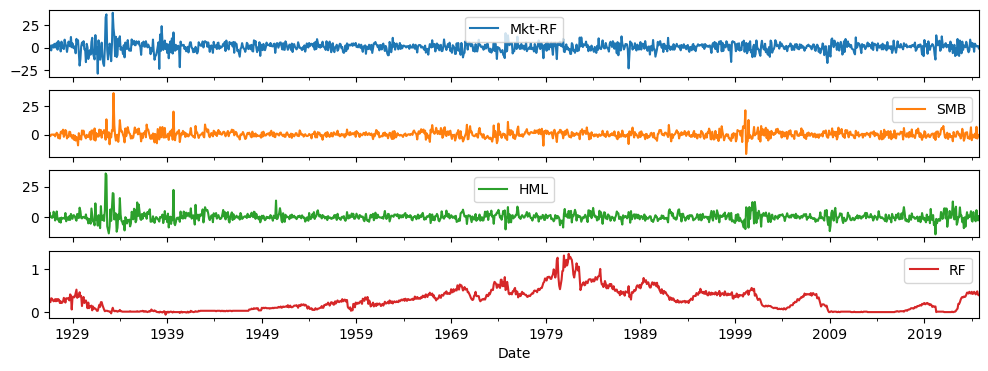

In [12]:
ff_df.plot(subplots = True, figsize=(12,4))

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

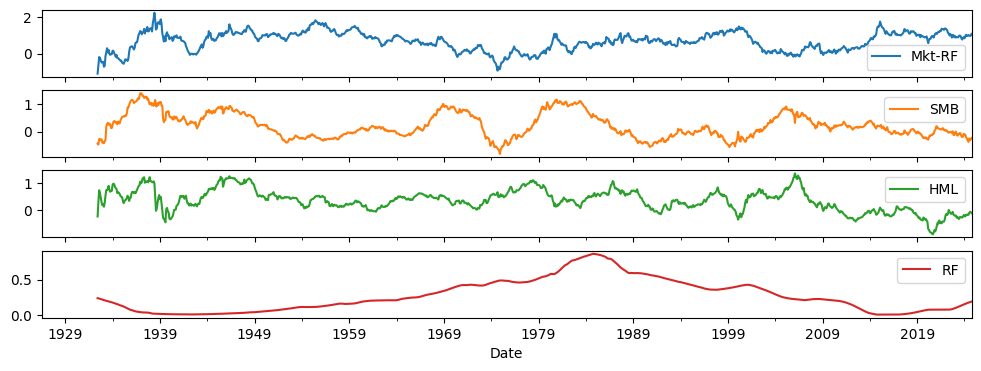

In [13]:
ff_df.rolling(72).mean().plot(subplots = True, figsize=(12,4))

<Axes: xlabel='Date'>

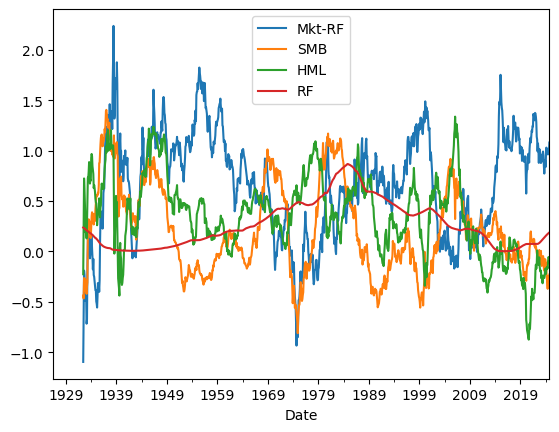

In [14]:
ff_df.rolling(72).mean().plot(subplots = False)

In [15]:
ff_mom_df = pandas_datareader.famafrench.FamaFrenchReader('F-F_Momentum_Factor',freq='M',start=start).read()[0]

/usr/local/python/3.12.1/lib/python3.12/site-packages/pandas_datareader/famafrench.py:114: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = read_csv(StringIO("Date" + src[start:]), **params)
/usr/local/python/3.12.1/lib/python3.12/site-packages/pandas_datareader/famafrench.py:114: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = read_csv(StringIO("Date" + src[start:]), **params)


<Axes: xlabel='Date'>

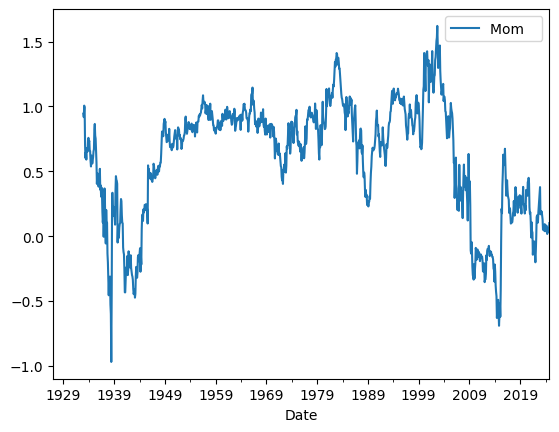

In [16]:
ff_mom_df.rolling(72).mean().plot()

In [21]:
ffac_merged_df = pd.merge(ff_df,ff_mom_df,on='Date',how='inner',sort=True,copy=True,indicator=False,validate='one_to_one')

<Axes: xlabel='Date'>

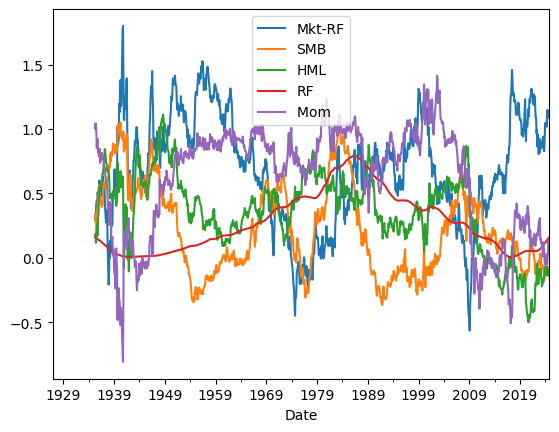

In [ ]:
#ffac_merged_df
ffac_merged_df.rolling(100).mean().plot(subplots = False)

In [34]:
ffac_merged_df.to_csv('4Factors.csv', index=False)

In [23]:
# AAPL_df = pandas_datareader.get_data_yahoo('AAPL',start=start)['Adj Close'].resample('M').ffill().pct_change()

AttributeError: 'NoneType' object has no attribute 'group'

### Save data to CSV

## Modeling

### Calculate Engineered Factors/Indicators

AR(1)
AR(2)
AR(3)
AR(4)
MA(1)
MA(2)
MA(3)
MA(4)


EWMA
5DMA
9DMA
10DMA
21DMA
30DMA
60DMA


Kinematic Position prediction from Return, Return Velocity, Return Acceleration
Kinematic Position prediction from Position, Velocity, Acceleration
Kinematic Position prediction from Position, Velocity, Acceleration, Mass (Order Volume)



### Run Models
#### Run OLS

#### Run LASSO

#### Run Elastic Net

#### Run Spike & Slab

### Volatility Models

#### ARCH

#### GARCH

#### TARCH

#### Implied Volatility / VIX

## Trade Decisions

### Strategy 1 - Mean-Variance Optimization

### Strategy 2

### Strategy 3

### Strategy 4